In [2]:
# %load ../../preconfig.py
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
plt.rcParams['axes.grid'] = False

#import numpy as np
#import pandas as pd
#import itertools

import logging
logger = logging.getLogger()


23 Minimum Spanning Trees
==============
**minimum-spanning-tree problem**:      
Given a connected, undirected graph $G = (V, E)$, and each edge $(u, v)$ has a weight $w(u, v)$. 

Then we wish to find an acyclic subset $T \subseteq E$:
$$\operatorname{argmin}_{T} \, w(T) = \displaystyle \sum_{(u, v) \in T} w(u, v)$$ 

We will use greedy algorithms to solve the minimum-spanning-tree problem, and we can prove that certain greedy strategies do yield a spanning tree with minimum weight.

### 23.1 Growing a minimum spanning tree
The generic method manages a set of edges $A$, maintaining the following loop invariant:    
*Prior to each iteration, $A$ is a subset of some minimum spanning tree.*

We can add an edge safely to $A$ while maintaing the invariant, then we call such an edge a **safe edge** for $A$.

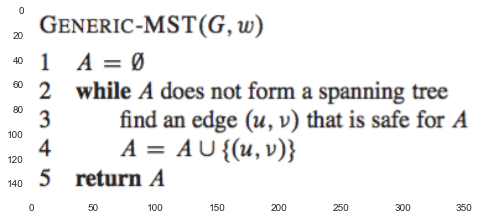

In [3]:
plt.imshow(plt.imread('./res/generic.png'))

#### rule for recognizing safe edges
define: 

1. $\operatorname{cut}(S, V-S) \subset G$.

2. We say an edge $(u, v)$ **crosses** the cut $(S, V-S)$ if $u \in S, v \in V - S$.

3. We say a cut **respects** a set $A$ of edges if no dege in $A$ crosses the cut.

4. **light edge**: its weight is the minimum of any edge crosing the cut.

Our rule for recognizing safe edges is given by the following theorem:

##### Theorem 23.1
Let $G = (V, E)$ be a connected, undirected graph with a real-valued weight function $w$ defined on $E$. Let $A$ be a subset of $E$ that is included in some minimum spanning tree for $G$, let $(S, V - S)$ be any cut of $G$ that respects $A$, and let $(u, v)$ be a light edge crossing $(S, V - S)$. Then, edge $(u, v)$ is safe for $A$.

proof: construct.      
details seen in textbook.

##### Corollary 23.2
Let $G = (V, E)$ be a connected, undirected graph with a real-valued weight function $w$ defined on $E$. Let $A$ be a subset of $E$ that is included in some minimum spanning tree for $G$, and let $C = (V_C, E_C)$ be a connected component (tree) in the forest $G_A = (V, A)$. If $(u, v)$ is a light edge connecting $C$ to some other component in $G_A$, then $(u, v)$ is safe for $A$.

In [4]:
# exercise

### 23.2 The algorithms of Kruskal and Prim
These two algorithms each use a specific rule to determine a safe edge in line 3 of GENREIC-MST.


#### Kruskal's algorithm
The set of $A$ is a forest. The safe edge added to $A$ is always a least-weight edge in the graph that connects two distinct components.

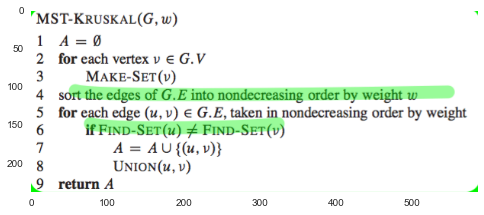

In [6]:
plt.imshow(plt.imread('./res/kru.png'))

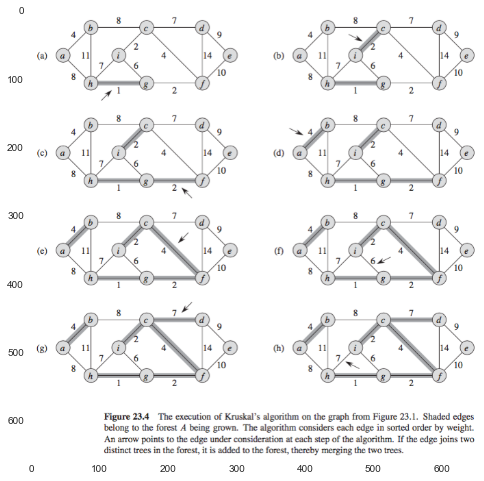

In [8]:
plt.figure(figsize=(8,12))
plt.imshow(plt.imread('./res/fig23_4.png'))

#### Prim's algorithm
The set $A$ forms a single tree. The safe edge added to $A$ is always a least-weight edge connecting the tree to a vertex not in the tree.

In order to implement Prim’s algorithm efficiently, we need a fast way to select a new edge to add to the tree formed by the edges in $A$:     
all vertices that are not in the tree reside in a min-priority queue $Q$ based on a $key$ attribute. For each vertex $v$, the attribute $v.\text{key}$ is the minimum weight of any edge connecting $v$ to a vertex in the tree.

$$A = \left \{(v, v.\pi) : v \in V - \{r\} - Q \right \}$$

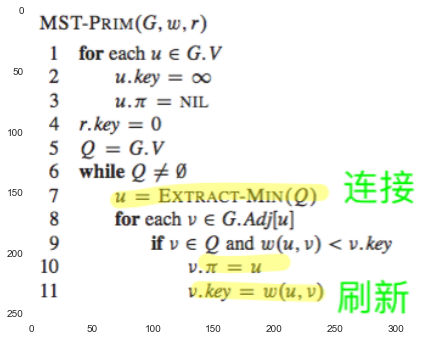

In [9]:
plt.imshow(plt.imread('./res/prim.png'))

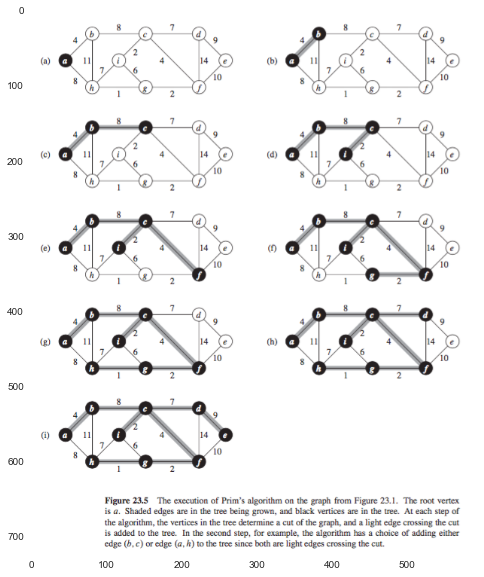

In [10]:
plt.figure(figsize=(8,12))
plt.imshow(plt.imread('./res/fig23_5.png'))

In [11]:
# Exercise